## 讀入CSV 檔

### 方法一

In [29]:
import pandas
orders = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', sep = '\t', header=None)

In [30]:
orders.columns = ['Time','Action','User','Product','Quantity','Price']
orders.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [31]:
orders['Time'] = pandas.to_datetime(orders['Time'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


### 方法二

In [13]:
import pandas
orders_url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab'
m_cols = ['Time','Action','User','Product','Quantity','Price']
orders = pandas.read_csv(orders_url, sep = '\t', 
                         header=None, names = m_cols,
                         parse_dates={'Dates':[0]}, 
                         encoding = 'utf-8', 
                         dtype = {'Price':'object'})

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ MB


In [15]:
?pandas.read_csv

## 讀入Excel 檔

In [2]:
import pandas
salary = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary2.xls')
salary.head()

WARNING *** file size (2662336) not 512 + multiple of sector size (512)


,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,97/1,工業及服務業,6621763,65740,36804,28936,1502,188.0,178.9,9.1
NaN,97/1,工業部門,3056248,65834,35249,30585,2512,193.5,177.9,15.6
NaN,97/1,服務業部門,3565515,65660,38138,27522,636,183.4,179.8,3.6
NaN,97/1,礦業及土石採取業,4817,75724,39973,35751,1062,190.6,185.6,5.0
NaN,97/1,製造業,2568373,67400,34621,32779,2774,195.2,177.7,17.5


In [3]:
salary['每人每月薪資'].max()

415055

In [4]:
salary.columns

Index(['時間(月)', '行業', '受僱員工人數', '每人每月薪資', '經常性\n薪資', '非經常性薪資', '加班費', '平均\n工時',
       '正常\n工時', '加班\n工時'],
      dtype='object')

In [5]:
salary.sort_values('經常性\n薪資', ascending=False).head(3)

,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,106/2,其他保險及退休基金輔助業,465,84937,84059,878,878,146.9,144.0,2.9
NaN,106/1,其他保險及退休基金輔助業,463,187783,84023,103760,1146,147.9,143.8,4.1
NaN,106/3,其他保險及退休基金輔助業,465,84644,83994,650,650,188.6,186.5,2.1


In [6]:
salary.groupby('行業')['經常性\n薪資'].mean().sort_values(ascending=False).head(3)

行業
其他保險及退休基金輔助業    77506.517241
電力供應業           69555.060345
海洋水運業           67587.112069
Name: 經常性\n薪資, dtype: float64

In [7]:
banking = salary[salary['行業'] == '銀行業'][['時間(月)','經常性\n薪資']]

In [8]:
banking.index = banking['時間(月)']

Populating the interactive namespace from numpy and matplotlib


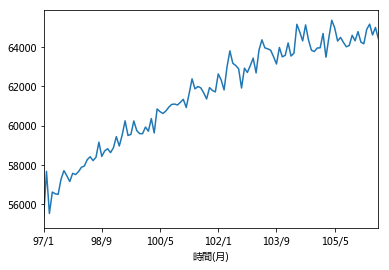

In [9]:
%pylab inline
banking['經常性\n薪資'].plot(kind = 'line')
pylab.savefig('banking.png')

## 如何讓圖片顯示中文
1. C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data
2. 修改 matplotlibrc
3. 找到 #font.sans-serif (line 211)
4. 拿掉註解 #, 後面加入 Microsoft YaHei
5. 將 font.family 改成 sans-serif, 拿掉註解 (199)
6. Restart Kernel


## 檔案輸出

In [49]:
orders.to_csv('orders.csv')

In [53]:
banking.to_csv('banking.csv')

In [50]:
orders.to_csv('orders.tsv', sep = '\t')

In [54]:
orders.to_csv('orders.tsv', sep = '\t', chunksize=1000)

In [52]:
orders.to_excel('orders.xlsx')

In [56]:
orders.head().to_json()

'{"Dates":{"0":1435708801000,"1":1435708803000,"2":1435708819000,"3":1435708870000,"4":1435708896000},"Action":{"0":"order","1":"order","2":"order","3":"order","4":"order"},"User":{"0":"U312622727","1":"U239012343","2":"U10007697373","3":"U296328517","4":"U300884570"},"Product":{"0":"P0006944501","1":"P0006018073","2":"P0002267974","3":"P0016144236","4":"P0014516980122"},"Quantity":{"0":1,"1":1,"2":1,"3":1,"4":1},"Price":{"0":"1069","1":"1680","2":"285","3":"550","4":"249"}}'

In [57]:
orders.head().T.to_json()

'{"0":{"Dates":1435708801000,"Action":"order","User":"U312622727","Product":"P0006944501","Quantity":1,"Price":"1069"},"1":{"Dates":1435708803000,"Action":"order","User":"U239012343","Product":"P0006018073","Quantity":1,"Price":"1680"},"2":{"Dates":1435708819000,"Action":"order","User":"U10007697373","Product":"P0002267974","Quantity":1,"Price":"285"},"3":{"Dates":1435708870000,"Action":"order","User":"U296328517","Product":"P0016144236","Quantity":1,"Price":"550"},"4":{"Dates":1435708896000,"Action":"order","User":"U300884570","Product":"P0014516980122","Quantity":1,"Price":"249"}}'

In [59]:
orders.head().to_clipboard()

In [60]:
df1 = pandas.read_clipboard()
df1

,,Dates,Action,User,Product,Quantity,Price
0,2015-07-01,00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01,00:00:03,order,U239012343,P0006018073,1,1680


In [70]:
product_list = pandas.read_clipboard(header=None)
product_items = product_list[0].tolist()

In [71]:
product_items

['P0012662252',
 'P0004401294',
 'P0000319874',
 'P0006944501',
 'P0003248055',
 'P0018924850',
 'P0013850723']

In [73]:
orders[orders['Product'].isin(product_items)].head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
6,2015-07-01 00:01:58,order,U465124055,P0012662252,1,488
7,2015-07-01 00:02:18,order,U403001364,P0004401294,1,276
8,2015-07-01 00:03:12,order,U465123247,P0000319874,1,2199
9,2015-07-01 00:03:45,order,U311808547,P0006944501,1,1069


## 讀取HTML


In [83]:
import requests
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
res = requests.get('https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330',verify=False, headers = headers)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [85]:
res.encoding='utf-8'
dfs = pandas.read_html(res.text)

In [86]:
type(dfs)

list

In [87]:
len(dfs)

18

In [98]:
dfs[16].head(3)

,年度,股本(億),財報評分,年度股價(元),獲利金額(億),獲利率(%),ROE(%),ROA(%),EPS(元),BPS(元),...,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0
,收盤,平均,漲跌,漲跌(%),營業收入,營業毛利,營業利益,業外損益,稅後淨利,營業毛利,...,業外損益,稅後淨利,稅後EPS,成長(元),Unnamed: 15_level_1,Unnamed: 16_level_1,Unnamed: 17_level_1,Unnamed: 18_level_1,Unnamed: 19_level_1,Unnamed: 20_level_1
0,17Q2,2593,94,239.0,206.0,57.5,31.7,4478,2302,1786,...,1539,51.4,39.9,1.19,34.4,22.5(年估),15.9(年估),5.94,0.65,51.74
1,2016,2593,91,181.5,166.0,38.5,26.9,9479,4748,3780,...,3342,50.1,39.9,0.84,35.3,25.6,18.9,12.89,1.07,53.58
2,2015,2593,94,143.0,140.0,2.0,1.4,8435,4104,3200,...,3066,48.7,37.9,3.60,36.3,27,19.4,11.82,1.64,47.11


In [99]:
tw2330 = dfs[16]

In [100]:
tw2330.to_html('tw2330.html')

## 分組切割

In [16]:
?pandas.cut

In [33]:
import numpy


In [34]:
orders['date'] = pandas.to_datetime(orders['Time'].dt.date)

In [35]:
a = (orders['Time'] - orders['date'])

In [36]:
import math
orders['tiemgroup'] = numpy.ceil(a.dt.total_seconds() / 300) * 300 
#orders.date +  pandas.Timedelta(seconds=orders['tiemgroup'])
orders.head()

,Time,Action,User,Product,Quantity,Price,date,tiemgroup
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,2015-07-01,300.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,2015-07-01,300.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,2015-07-01,300.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,2015-07-01,300.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,2015-07-01,300.0


In [43]:
?pandas.to_timedelta

In [46]:
orders['Time2'] = orders['date'] + pandas.to_timedelta(orders['tiemgroup'] , unit = 's')

In [50]:
orders.head(3)

,Time,Action,User,Product,Quantity,Price,date,tiemgroup,Time2
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,2015-07-01,300.0,2015-07-01 00:05:00
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,2015-07-01,300.0,2015-07-01 00:05:00
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,2015-07-01,300.0,2015-07-01 00:05:00


## 資料儲存

In [68]:
import sqlite3
con = sqlite3.connect('test.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print(data)
con.close()

('3.14.2',)


In [70]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print(data)

('3.14.2',)


In [72]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','John Doe',53)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)")
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data = cur.fetchall()
    print(data)
    

[('0912173381', 'United State'), ('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [1]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','John Doe',53)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)")
    cur.execute("SELECT phone,address FROM PhoneAddress")
    print('FETCHONE')
    data = cur.fetchone()
    print(data)
    
    
    print('FETCHALL')
    data = cur.fetchall()
    print(data)    

FETCHONE
('0912173381', 'United State')
FETCHALL
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [2]:
import pandas
employee=[{'name':'Mary','age':23,'gender':'F'},{'name':'John','age':33,'gender':'M'}]
df=pandas.DataFrame(employee)
df

,age,gender,name
0,23,F,Mary
1,33,M,John


In [3]:
with sqlite3.connect('test.sqlite') as db:
    df.to_sql(name='employee',index=False,con=db,if_exists='replace')

In [4]:
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)

In [6]:
df.head(1)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.25081


In [7]:
def normalizePrice(ele):
    res=int(ele.replace('元/月','').replace(',',''))
    return res

df['price']=df['price'].map(normalizePrice)

In [9]:
df=df[['detail_url','search_date','title','address','floor_info','price','layout','building_area','building_use']]

In [12]:
df['btype']=df['building_use'].map(lambda e:str(e).split('/')[0])
df['buse']=df['building_use'].map(lambda e:str(e).split('/')[1] if len(str(e).split('/'))>1 else None)

In [13]:
df.head(1)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,透天厝,獨立套房


In [14]:
import sqlite3 as lite
import pandas 
with lite.connect('house.sqlite') as db:
    df.to_sql('rent_591',con=db,if_exists='replace',index=None)

In [16]:
import sqlite3 as lite
import pandas 
with lite.connect('house.sqlite') as db:
    res = pandas.read_sql_query('select title, detail_url , price from rent_591 order by price desc limit 3', con = db)

res

,title,detail_url,price
0,樹林區俊英街,https://rent.591.com.tw/rent-detail-5133302.html,12750000
1,★彈性坪數、樓層可調整★市府捷運頂級商辦,https://rent.591.com.tw/rent-detail-5047313.html,9579496
2,內湖土地短租5年4000坪方正四面臨路,https://rent.591.com.tw/rent-detail-5191373.html,8000000


In [19]:
# select * from rent_591 limit 3;
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,透天厝,獨立套房
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,10.0,透天厝/獨立套房,透天厝,獨立套房
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,電梯大樓,分租套房


In [20]:
# select * from rent_591 where price>10000 limit 3;
df[df['price'] > 10000].head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,電梯大樓,分租套房
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,24.0,電梯大樓/整層住家,電梯大樓,整層住家
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,32.0,電梯大樓/整層住家,電梯大樓,整層住家


In [22]:
# select title,building_area,price from rent_591 limit 3;
df.loc[ :  ,  ['title','building_area','price']  ].head(3)

,title,building_area,price
0,套房出租-近東方學院(六~八月可入住),6.0,4500
1,好房子【聰明的你、妳快來租吧】,10.0,7500
2,陽台大套房(獨立洗衣機)近頂溪捷運站,8.0,11000


In [25]:
# select title,building_area,price from rent_591 order by price desc limit 3;
df.sort_values('price', ascending=False)[['title','building_area', 'price']].head(3)

,title,building_area,price
31658,樹林區俊英街,16.00,12750000
9815,★彈性坪數、樓層可調整★市府捷運頂級商辦,2520.92,9579496
69807,內湖土地短租5年4000坪方正四面臨路,4000.00,8000000


In [26]:
#select btype,avg(price) from rent_591 group by btype;
df.groupby('btype')['price'].mean()

btype
nan      84789.830692
倉庫       25248.425926
公寓       16350.106894
其他        5700.000000
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64

In [27]:
# select btype,avg(price) from rent_591 group by btype having avg(price)>=10000;
avg_price = df.groupby('btype')['price'].mean()
avg_price[avg_price > 10000]

btype
nan      84789.830692
倉庫       25248.425926
公寓       16350.106894
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64

## 資料視覺化

In [52]:
! pip install pandas_datareader

In [55]:
import pandas_datareader
df = pandas_datareader.get_data_yahoo('AAPL', start = '2014-01-01')

In [56]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-10-30,163.889999,168.070007,163.720001,166.720001,166.720001,44700800
2017-10-31,167.899994,169.649994,166.940002,169.039993,169.039993,36046800
2017-11-01,169.869995,169.940002,165.610001,166.889999,166.889999,33637800
2017-11-02,166.600006,168.500000,165.279999,168.110001,168.110001,41393400
2017-11-03,174.000000,174.259995,171.119995,172.500000,172.500000,59003700


Populating the interactive namespace from numpy and matplotlib


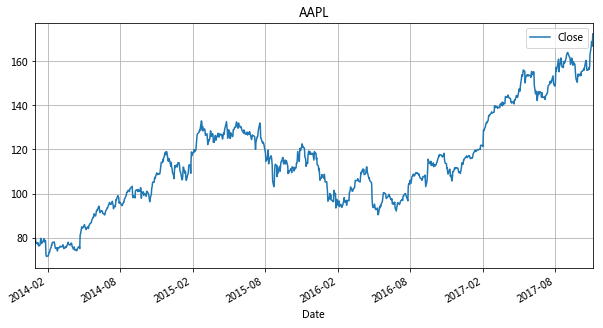

In [64]:
% pylab inline
df['Close'].plot(kind = 'line', figsize=[10,5], title= 'AAPL', grid=True,legend=True)
pylab.savefig('AAPL.png')

In [67]:
df['mvg30'] = df['Close'].rolling(window=30).mean()
df['mvg60'] = df['Close'].rolling(window=60).mean()

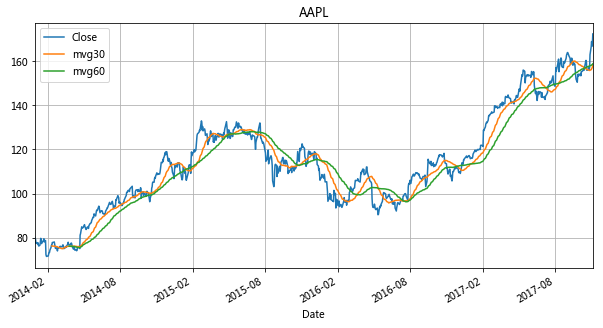

In [68]:
df[['Close','mvg30','mvg60']].plot(kind = 'line', figsize=[10,5], title= 'AAPL', grid=True,legend=True)

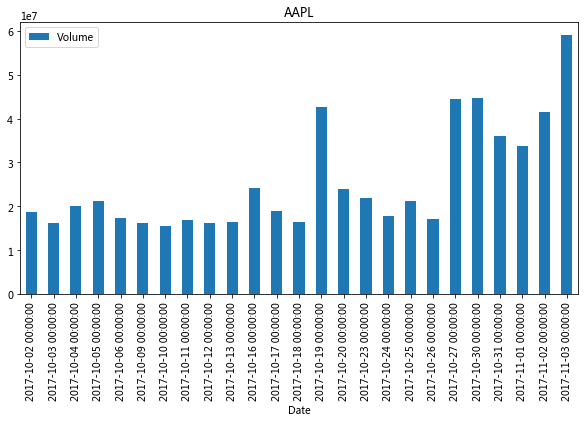

In [70]:
df.ix[df.index>='2017-10-01','Volume'].plot(kind='bar',figsize=[10,5],title="AAPL",legend=True)

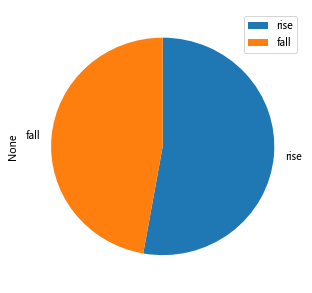

In [81]:
df['diff']=df['Close']-df['Open']
df['rise']=df['diff']>0
df['fall']=df['diff']<0
#,startangle=90,legend=True
df[['rise','fall']].sum().plot(kind='pie',figsize=[5,5],startangle=90,counterclock=False,legend=True)

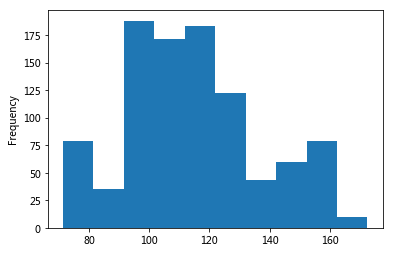

In [82]:
df['Close'].plot(kind='hist')

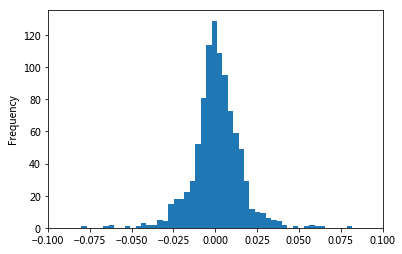

In [93]:
df['ret'] = df['Close'].pct_change(1)
df['ret'].plot(kind='hist',bins=50,xlim=[-0.1,0.1])

In [88]:
import pandas_datareader
df2 = pandas_datareader.get_data_yahoo('2498.TW', start = '2010-01-01')

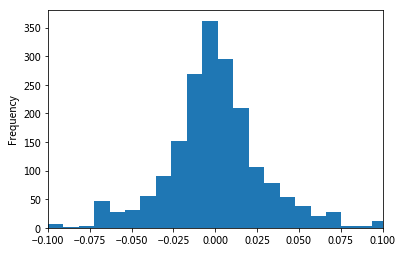

In [92]:
df2['ret'] = df2['Close'].pct_change(1)
df2['ret'].plot(kind='hist',bins=50,xlim=[-0.1,0.1])

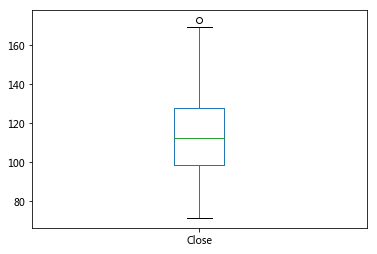

In [94]:
df['Close'].plot(kind='box')

In [102]:
temp = numpy.array([20,30,25,27,29,16,18,32])
temp.mean()


temp2 = numpy.array([20,30,25,27,29,16,18,32,999])
temp2.mean()
temp2.sort()
temp2
#numpy.median(temp2)

array([ 16,  18,  20,  25,  27,  29,  30,  32, 999])

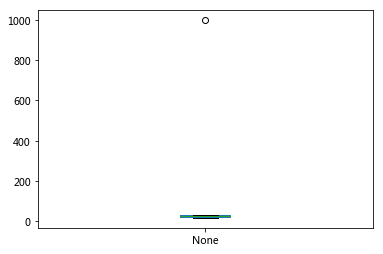

In [104]:
pandas.Series(temp2).plot(kind='box')

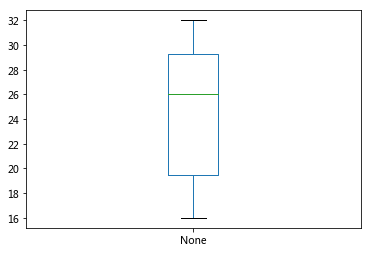

In [105]:
pandas.Series(temp2[temp2 < 100]).plot(kind='box')

In [114]:
import pandas_datareader 
df=pandas_datareader.get_data_yahoo(['FB','AAPL','AMZN','MSFT','GOOG'],start='2014-01-01')['Close']
df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-11-03,172.500000,1111.599976,178.919998,1032.479980,84.139999
2017-11-02,168.110001,1094.219971,178.919998,1025.579956,84.050003
2017-11-01,166.889999,1103.680054,182.660004,1025.500000,83.180000
2017-10-31,169.039993,1105.280029,180.059998,1016.640015,83.180000
2017-10-30,166.720001,1110.849976,179.869995,1017.109985,83.889999


Populating the interactive namespace from numpy and matplotlib


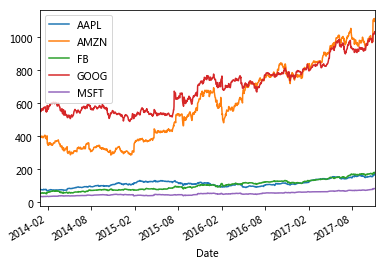

In [115]:
%pylab inline 
df.plot(kind='line')

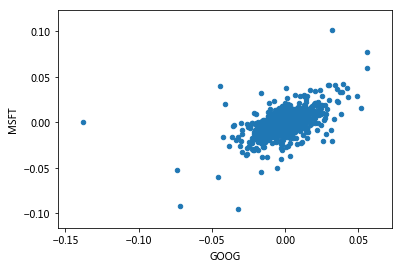

In [116]:
rets=df.pct_change(1)
rets.plot(kind='scatter',x='GOOG',y='MSFT')

In [117]:
corr=rets.corr()

In [118]:
corr

,AAPL,AMZN,FB,GOOG,MSFT
AAPL,1.000000,0.338576,0.392200,0.389099,0.442549
AMZN,0.338576,1.000000,0.529586,0.573046,0.424553
FB,0.392200,0.529586,1.000000,0.599075,0.432665
GOOG,0.389099,0.573046,0.599075,1.000000,0.572129
MSFT,0.442549,0.424553,0.432665,0.572129,1.000000


([<matplotlib.axis.YTick at 0x1754e908>,
 <a list of 5 Text yticklabel objects>)

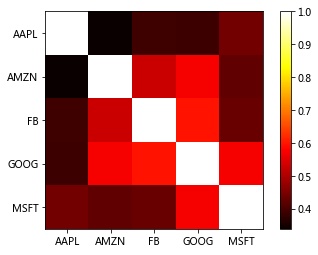

In [119]:
plt.imshow(corr,cmap='hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

In [121]:
import pandas_datareader 
df=pandas_datareader.get_data_yahoo(['1101.TW','1102.TW','2498.TW','2454.TW','2317.TW','2330.TW','AAPL'],start='2016-01-01')['Close']
df.head()

,1101.TW,1102.TW,2317.TW,2330.TW,2454.TW,2498.TW,AAPL
Date,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,105.260002
2016-01-04,26.150000,26.250000,71.818199,139.5,245.0,79.000000,105.349998
2016-01-05,26.400000,26.000000,71.909103,138.0,242.5,77.800003,102.709999
2016-01-06,26.049999,25.950001,71.818199,135.5,227.0,76.800003,100.699997
2016-01-07,27.350000,26.150000,71.181801,133.0,206.0,77.000000,96.449997


In [122]:
rets=df.pct_change(1)
corr=rets.corr()

In [123]:
corr

,1101.TW,1102.TW,2317.TW,2330.TW,2454.TW,2498.TW,AAPL
1101.TW,1.000000,0.467808,0.273911,0.309529,0.162141,0.134564,-0.042625
1102.TW,0.467808,1.000000,0.249334,0.236307,0.177028,0.141684,-0.013318
2317.TW,0.273911,0.249334,1.000000,0.446104,0.276597,0.109461,0.105676
2330.TW,0.309529,0.236307,0.446104,1.000000,0.413251,0.299764,0.148862
2454.TW,0.162141,0.177028,0.276597,0.413251,1.000000,0.224951,0.085535
2498.TW,0.134564,0.141684,0.109461,0.299764,0.224951,1.000000,-0.003662
AAPL,-0.042625,-0.013318,0.105676,0.148862,0.085535,-0.003662,1.000000


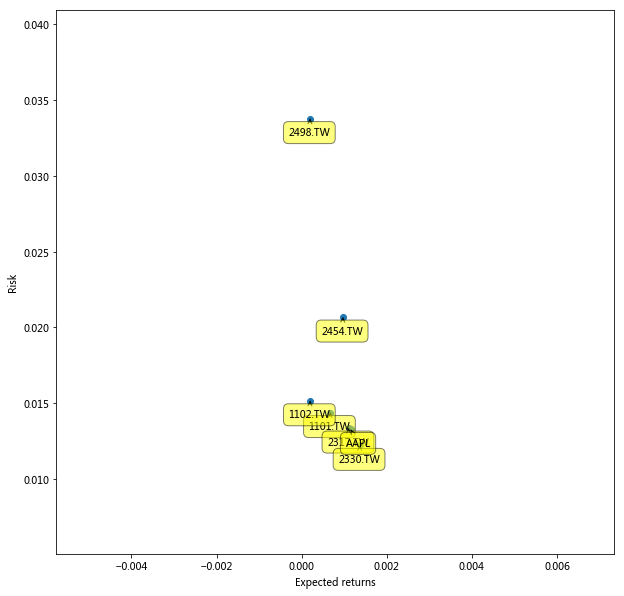

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [130]:
import pandas_datareader 
df=pandas_datareader.get_data_yahoo(['FB','AAPL','AMZN','MSFT','GOOG'],start='2014-01-01')['Close']
df.head()

,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2017-11-03,172.500000,1111.599976,178.919998,1032.479980,84.139999
2017-11-02,168.110001,1094.219971,178.919998,1025.579956,84.050003
2017-11-01,166.889999,1103.680054,182.660004,1025.500000,83.180000
2017-10-31,169.039993,1105.280029,180.059998,1016.640015,83.180000
2017-10-30,166.720001,1110.849976,179.869995,1017.109985,83.889999


In [131]:
rets=df.pct_change(1)

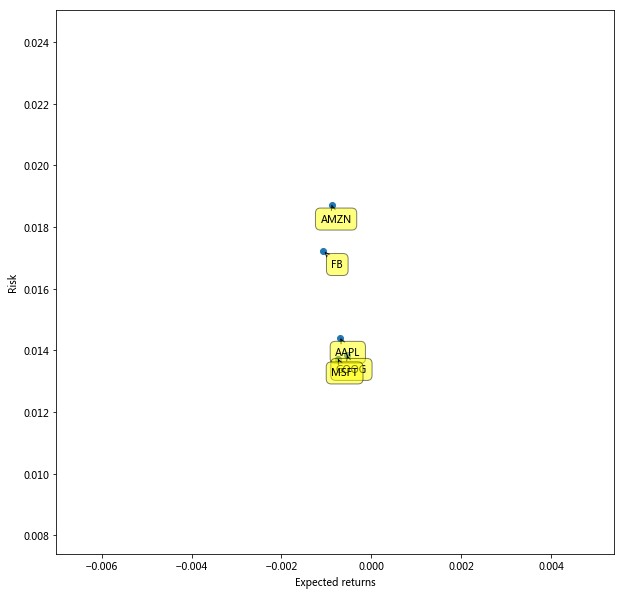

In [132]:
plt.figure(figsize=(10,10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## 虛擬貨幣

In [135]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd/90_days.json')
btc = pandas.DataFrame(res.json()['stats'])

In [137]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/ethereum/usd/90_days.json')
eth = pandas.DataFrame(res.json()['stats'])


In [138]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/litecoin/usd/90_days.json')
ltc = pandas.DataFrame(res.json()['stats'])

In [149]:
ltc.columns = ['tm', 'ltc']
ltc.index = ltc['tm']
del ltc['tm']
ltc.head()

,ltc
tm,
1.502150e+12,48.68
1.502237e+12,48.11
1.502323e+12,46.45
1.502410e+12,46.51
1.502496e+12,46.05


In [150]:
btc.columns = ['tm', 'btc']
btc.index = btc['tm']
del btc['tm']
btc.head()

,btc
tm,
1.502150e+12,3410.45
1.502237e+12,3330.90
1.502323e+12,3367.91
1.502410e+12,3562.59
1.502496e+12,3800.14


In [151]:
eth.columns = ['tm', 'eth']
eth.index = eth['tm']
del eth['tm']
eth.head()

,eth
tm,
1.502150e+12,295.15
1.502237e+12,297.07
1.502323e+12,296.78
1.502410e+12,306.83
1.502496e+12,308.63


In [152]:
btc_eth = pandas.merge(btc, eth, left_index=True, right_index=True)

In [154]:
ltc_btc_eth = pandas.merge(ltc, btc_eth, left_index=True, right_index=True)

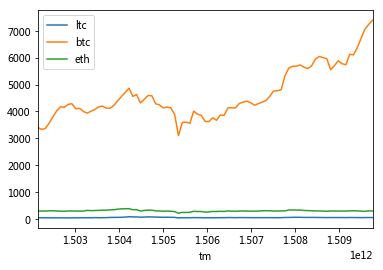

In [156]:
ltc_btc_eth.plot(kind = 'line')

In [157]:
rets=ltc_btc_eth.pct_change(1)
corr=rets.corr()
corr

,ltc,btc,eth
ltc,1.000000,0.664507,0.711046
btc,0.664507,1.000000,0.706732
eth,0.711046,0.706732,1.000000


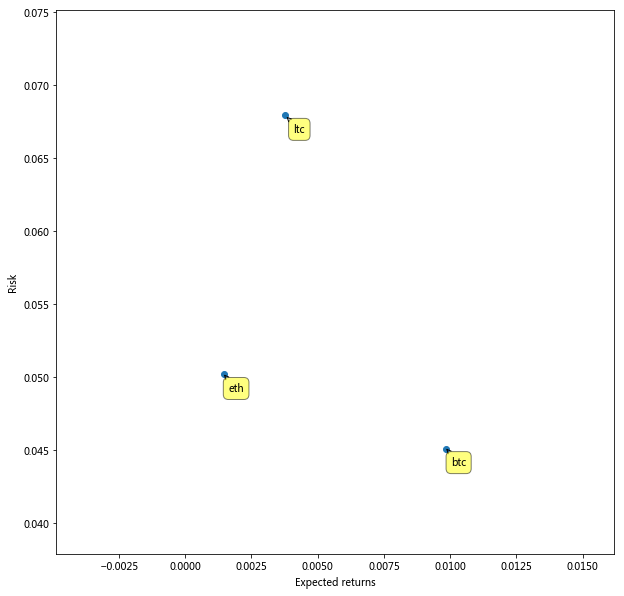

In [158]:
plt.figure(figsize=(10,10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Plotly

In [159]:
! pip install plotly

  Running setup.py bdist_wheel for plotly: started
  Running setup.py bdist_wheel for plotly: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\cc\87\3f\6a282eb21da5d8223472bed40ee023cdcf2e9691b117969a4c
Successfully built plotly


In [160]:

import plotly
from plotly.graph_objs import Scatter, Layout

plotly.offline.plot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})

'file://C:\\Users\\USER\\temp-plot.html'

## Tableau
- 使用Tableau 做財經資訊視覺化
- https://youtu.be/C0xcXvte8N0
- https://public.tableau.com/en-us/s/

In [187]:
from Crypto.Cipher import XOR
import base64
key = 'RLuqOAstour9aGoA'
def encrypt(plaintext):
    cipher = XOR.new(key)
    return base64.b64encode(cipher.encrypt(plaintext))

def decrypt(ciphertext):
    cipher = XOR.new(key)
    return cipher.decrypt(base64.b64decode(ciphertext))


#Code stores the encrypted information
code = '''
載著美國總統川普的空軍一號飛機，今晨在日本的橫田美軍基地降落，這是川普亞洲5國馬拉松訪問的第一站。川普表示，在訪問亞洲期間將會晤俄羅斯總統普丁，希望普丁協助解決北韓問題。他隨後將前往高爾夫球場，與日本首相安倍晉三球敘。 '''
encrypt(code)

b'WKTJ+KfQ5JPR+5el6qDX/LX5xJT43JXtwZLovYbu1anpwZHJz6nq64bW6d/I2ID93qjO+6nY25Hz3ZSuxKHz7bXW8Zfm6pTg35LMt4n84qTN9pDt/6jq+Yflz9bdy4bBy6rt3qr27pL225aD/6Hb82ep6fqm59+S5PyUpN+vx+u32fqW1cWU2MORyrmG7Pai0s6QxtKn6tqH1Nrexf2A/d6p6dmn6dmR+vqWg/+h2/O00OqY2dKWxOiT7rqH3sul7ciSz8qn5duIzc/e1PaJ2PyozfCg/f+R1/mUpfqh9u+29PSUwtWW/sad1ZqH9tWk3tuc7tyk5vuG1P7a4cWL+sSl79mq//+R3/KXsOyi0cG75+2Wx/+W0MSS4rqE59uu7sCd+cin5NGJ6d7Qx9GI2uqp2/iqwf6S9vyWgeig/8K02e2Sz8NT'

In [181]:
a = encrypt(code)

In [184]:
decrypt(a).decode('utf-8')

'\n載著美國總統川普的空軍一號飛機，今晨在日本的橫田美軍基地降落，這是川普亞洲5國馬拉松訪問的第一站。川普表示，在訪問亞洲期間將會晤俄羅斯總統普丁，希望普丁協助解決北韓問題。他隨後將前往高爾夫球場，與日本首相安倍晉三球敘。 '

## 敘述性統計

In [188]:
import pandas_datareader
tw2330 = pandas_datareader.get_data_yahoo('2330.TW', start = '2004-01-01')

Populating the interactive namespace from numpy and matplotlib


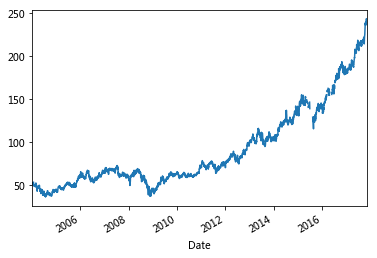

In [189]:
% pylab inline
tw2330['Close'].plot(kind = 'line')

In [190]:
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3448 entries, 2004-01-02 to 2017-11-03
Data columns (total 6 columns):
Open         3325 non-null float64
High         3325 non-null float64
Low          3325 non-null float64
Close        3325 non-null float64
Adj Close    3325 non-null float64
Volume       3325 non-null float64
dtypes: float64(6)
memory usage: 188.6 KB


In [191]:
tw2330.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3325.000000,3325.000000,3325.000000,3325.000000,3325.000000,3.325000e+03
mean,88.734725,89.498570,87.908122,88.754832,74.069967,8.381512e+09
std,46.561147,46.762265,46.384804,46.610295,50.641337,2.344190e+10
min,34.079601,36.694500,34.079601,35.990398,21.460321,0.000000e+00
25%,58.219898,58.723900,57.384998,58.015900,38.503231,3.029700e+07
50%,67.699997,68.169502,67.099998,67.677002,49.055164,4.363490e+07
75%,111.000000,111.500000,109.500000,111.000000,97.095573,6.965500e+07
max,243.500000,245.000000,241.500000,243.000000,243.000000,3.383839e+11


In [192]:
tw2330['Close'].min()

35.990397999999999

In [193]:
tw2330['Close'].max()

243.0

In [194]:
tw2330['Close'].mean()

88.75483157082701

In [195]:
tw2330['Close'].mean()

88.75483157082701

In [196]:
tw2330['Close'].median()

67.677002

In [200]:
tw2330['Close'].quantile(0.75) 
tw2330['Close'].quantile(0.25) 
IQR =  tw2330['Close'].quantile(0.75)  - tw2330['Close'].quantile(0.25)
IQR

52.9841

In [202]:
tw2330['Close'].describe()

count    3325.000000
mean       88.754832
std        46.610295
min        35.990398
25%        58.015900
50%        67.677002
75%       111.000000
max       243.000000
Name: Close, dtype: float64

Populating the interactive namespace from numpy and matplotlib


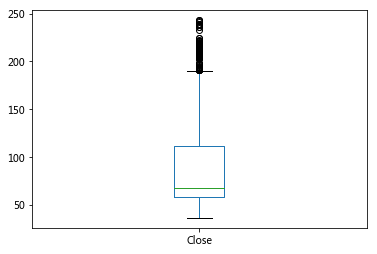

In [203]:
%pylab inline
tw2330['Close'].plot(kind='box')

In [205]:
import pandas
lvr = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathayr/master/data/lvr_prices.csv', index_col=0)
lvr.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



,area,trading_target,address,land_sqmeter,city_land_type,non_city_land_type,non_city_code,trading_ymd,trading_num,floor,...,bath,compartment,management,total_price,price_per_sqmeter,parking_type,parking_sqmeter,parking_price,comments,numbers
0,大安區,房地(土地+建物),臺北市大安區和平東路三段1巷72弄1~30號,19.39,住,NaN,NaN,2012-06-29,土地1建物2車位0,五層,...,1,有,有,18680000,184999.0,NaN,0.0,0,NaN,RPQNMLSJQHHFFFA08CA
1,中正區,房地(土地+建物),臺北市中正區忠孝東路二段121~150號,8.46,商,NaN,NaN,2012-07-18,土地3建物1車位0,九層,...,0,有,有,20300000,217307.0,NaN,0.0,0,NaN,RPQOMLKLQHHFFBA17CA
2,大同區,土地,橋北段二小段601~630地號,5.50,其他,NaN,NaN,2012-07-27,土地1建物0車位0,NaN,...,0,有,無,132096,24017.0,NaN,0.0,0,NaN,RPUNMLLMQHHFFBA67CA
3,大同區,房地(土地+建物),臺北市大同區重慶北路一段61~90號,3.88,商,NaN,NaN,2012-07-10,土地4建物1車位0,六層,...,1,有,有,4200000,114317.0,NaN,0.0,0,NaN,RPOPMLRKJHIFFBA07CA
4,內湖區,房地(土地+建物),臺北市內湖區民權東路六段90巷6弄1~30號,32.41,住,NaN,NaN,2012-07-10,土地1建物1車位0,三層,...,1,有,無,14000000,134473.0,NaN,0.0,0,NaN,RPPPMLPKQHHFFCA67CA


In [208]:
lvr.groupby('area')['total_price'].mean().sort_values(ascending=False)

area
中正區    3.242663e+07
大安區    3.202420e+07
信義區    3.074577e+07
內湖區    3.040402e+07
中山區    2.756887e+07
松山區    2.635170e+07
南港區    2.523579e+07
士林區    2.413990e+07
北投區    2.128492e+07
大同區    1.899462e+07
文山區    1.695387e+07
萬華區    1.526880e+07
Name: total_price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



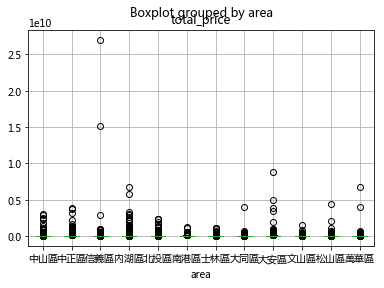

In [209]:
import numpy as np
#taipei['logprice'] = np.log10(taipei['price']) 
lvr.boxplot(column='total_price',by='area')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



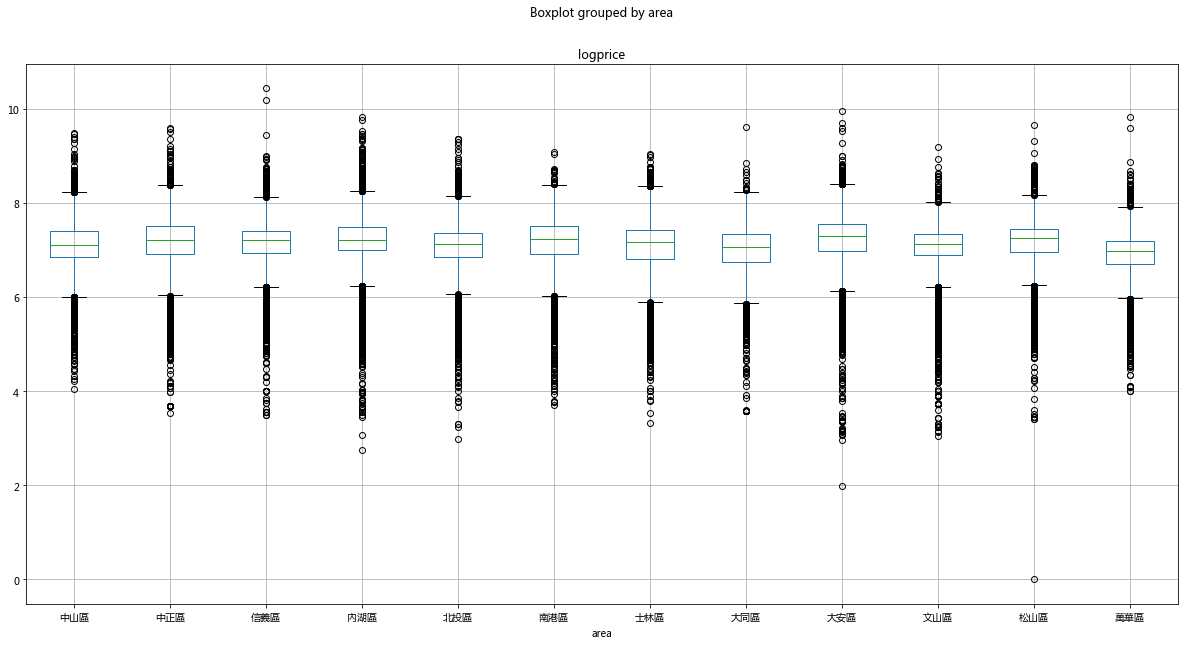

In [212]:
import numpy as np
lvr['logprice'] = np.log10(lvr['total_price']) 
lvr.boxplot(column='logprice',by='area',figsize=[20,10])

In [215]:
lvr.groupby('area')['total_price'].median().sort_values(ascending=False)

area
大安區    20000000
松山區    17800000
南港區    16685000
內湖區    16500000
中正區    16200000
信義區    15800000
士林區    14350000
文山區    13300000
北投區    13000000
中山區    12800000
大同區    11770000
萬華區     9542595
Name: total_price, dtype: int64

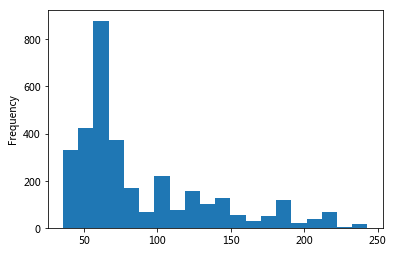

In [216]:
tw2330['Close'].plot(kind='hist',bins=20)

In [217]:
tw2330['ret'] = tw2330['Close'].pct_change(1)

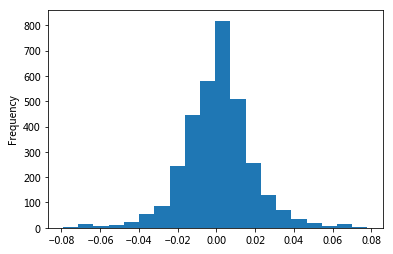

In [218]:

tw2330['ret'].plot(kind='hist',bins=20)

In [226]:
import math
m = 50
(40 - m)  + (60 - m)
abs(40 - m)  + abs(60 - m)

20

In [230]:
((40 - m) ** 2 + (60-m) **2) / 2

100.0

In [232]:
tw2330['Close'].var()

2172.519616493225

In [234]:
tw2330['Close'].std()

tw2330['Close'].std() ** 2

2172.5196164932245

## 多變量分析

In [235]:
df = pandas_datareader.get_data_yahoo(['^TWII', '2330.TW'])['Close']


In [237]:
df.cov()

,2330.TW,^TWII
2330.TW,2170.587727,33114.435302
^TWII,33114.435302,772378.913329


In [238]:
df.corr()

,2330.TW,^TWII
2330.TW,1.000000,0.799504
^TWII,0.799504,1.000000


## 點估計與信賴區間

In [252]:
np.random.choice(range(0,42) , 6)

array([37, 39, 19, 13, 18, 36])

In [261]:
tw2330['ret'] = tw2330['Close'].pct_change(1)

In [266]:
import numpy as np
np.random.seed(10)
tw2330 = tw2330[tw2330['ret'].notnull()]
#np.random.choice(range(0,42) , 6)
sample_size=100
sample=np.random.choice(a=tw2330['ret'],size=sample_size)
sample_mean=sample.mean()

In [267]:
sample_mean

-0.0015899297137405865

In [270]:
from scipy import stats
z_critical=stats.norm.ppf(q=0.975)
z_critical

z_critical_2=stats.norm.ppf(q=0.025)
z_critical_2

-1.9599639845400545

In [271]:
pop_stdev=tw2330['ret'].std()
margin_of_error= z_critical*(pop_stdev/math.sqrt(sample_size))

In [273]:
sample_mean - margin_of_error, sample_mean +  margin_of_error

(-0.0050692196250788253, 0.0018893601975976519)

In [274]:
tw2330['ret'].mean()

0.0006250650549303948

In [276]:
from scipy import stats 
one_sample_data=[15.48,4.4,5.81,6.07,5.19,3.25,4.41,5.05,11.63,8.99]
one_sample=stats.ttest_1samp(one_sample_data,8)
print(one_sample[1]/2)

0.22325177944
